# Resumos e um pouco de Visualização no pantas

## Resumo

Vamos ver alguns métodos para analisas nossas tabelas (dataframes)

Além disso, vamos usar os plot de gráfico padrões do pandas, mas no projeto de DataScience veremos outras mais bonitas e também muito práticas.

OBS: O pandas usa o matplolib (que vimos na seção de "módulos e bibliotecas") para plotar gráficos.
Se quiser personalizar mais do que o padrão do pandas, Importe o matplotlib e use os métodos matplotlib

* Preparando as bases de dados (o que dizemos na última aula)

In [17]:
import pandas as pd

# Importando os arquivos
vendas_df    = pd.read_csv(r'.\Pandas 05 - Dados\Contoso - Vendas - 2017.csv',     sep=';', encoding='utf-8')
produtos_df  = pd.read_csv(r'.\Pandas 05 - Dados\Contoso - Cadastro Produtos.csv', sep=';', encoding='ANSI')
lojas_df     = pd.read_csv(r'.\Pandas 05 - Dados\Contoso - Lojas.csv',             sep=';', encoding='ANSI')
clientes_df  = pd.read_csv(r'.\Pandas 05 - Dados\Contoso - Clientes.csv',          sep=';', encoding='ANSI')
promocoes_df = pd.read_csv(r'.\Pandas 05 - Dados\Contoso - Promocoes.csv',         sep=';', encoding='ANSI')

# Limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]
promocoes_df = promocoes_df[['ID Promocao', 'Nome Promocao']]

# Mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto').merge(lojas_df, on='ID Loja').merge(clientes_df, on='ID Cliente').merge(promocoes_df, on='ID Promocao')
vendas_df = vendas_df.drop(columns=['ID Loja', 'ID Produto', 'ID Promocao']).rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente,Nome Promocao
0,1,01/01/2017,02/01/2017,1,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,Promoção de Primavera Americana
1,2,01/01/2017,06/01/2017,5,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com,Promoção de Primavera Americana
2,3,01/01/2017,01/01/2017,0,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com,Promoção Férias Asiáticas
3,4,01/01/2017,01/01/2017,0,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com,Promoção Férias Asiáticas
4,5,01/01/2017,07/01/2017,6,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com,Promoção de Primavera Americana
...,...,...,...,...,...,...,...,...,...,...,...
971360,980638,31/12/2017,31/12/2017,0,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu,Promoção Férias Escolares Americanas
971361,980639,31/12/2017,06/01/2018,6,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com,Promoção Férias Escolares Americanas
971362,980640,31/12/2017,03/01/2018,3,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org,Promoção de Férias Europeias
971363,980641,31/12/2017,31/12/2017,0,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com,Promoção Férias Escolares Americanas


### Qual cliente que comprou mais vezes?

* Usaremso o método .value_counts() para contar quantas vezes cada valor do Dataframe aparece
* Usatemos o método .plot() para exibir um gráfico

E-mail do Cliente
karen33@adventure-works.com     77
chloe77@adventure-works.com     74
gilbert9@adventure-works.com    68
julia43@adventure-works.com     67
karen16@adventure-works.com     67
Name: count, dtype: int64

<Axes: xlabel='E-mail do Cliente'>

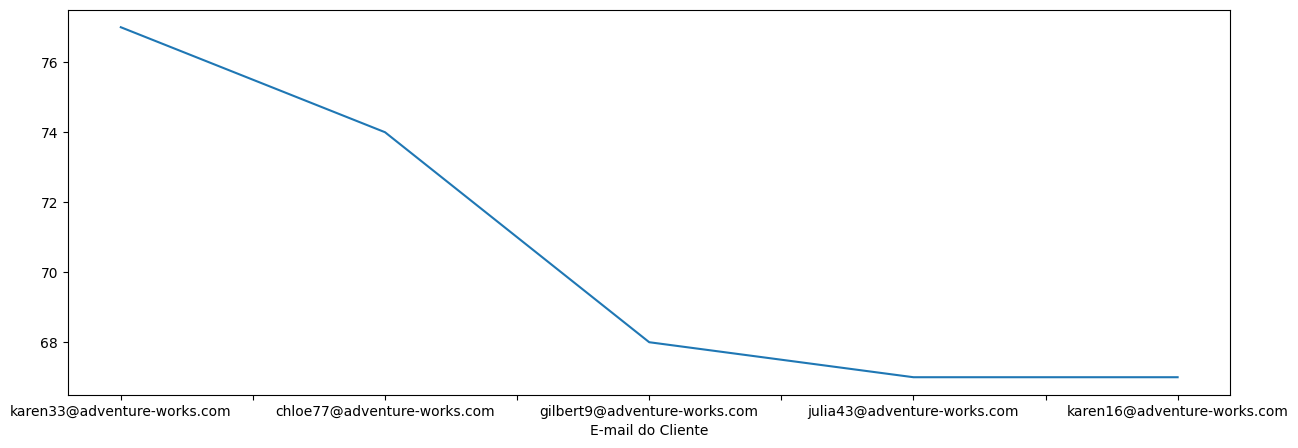

In [26]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_clientes[2:7]) # A base de dados contém erros, por isso exluí os 2 primeiros

frequencia_clientes[2:7].plot(figsize=(15, 5))

### Qual a Loja que mais vendeu?

* Usaremso o .groupby para agrupar o nosso dataframe, de acordo com o que queremos (somando as quantidades de vendas, por exemplo)

- Agora precisamos pegar o maior valor. Temos 2 formas:
    1. Ordenar o dataframe em ordem decrescente de Quantidade Vendida
        - Método .sort_values
    2. Pegar o Maior valor diretamente
        - Métodos .max() e .idxmax()

In [27]:
#ordenando o dataframe

#podemos plotar em um gráfico


In [28]:
#pegando o maior valor e se índice


In [20]:
#vamos renomear o e-mail para ficar claro que é do cliente



### Qual produto que menos vendeu?

- Já temos uma lista criada para isso, basta verificarmos o final da lista (já que ela está ordenada) ou então usarmos os métodos:
    1. min()
    2. idxmin()